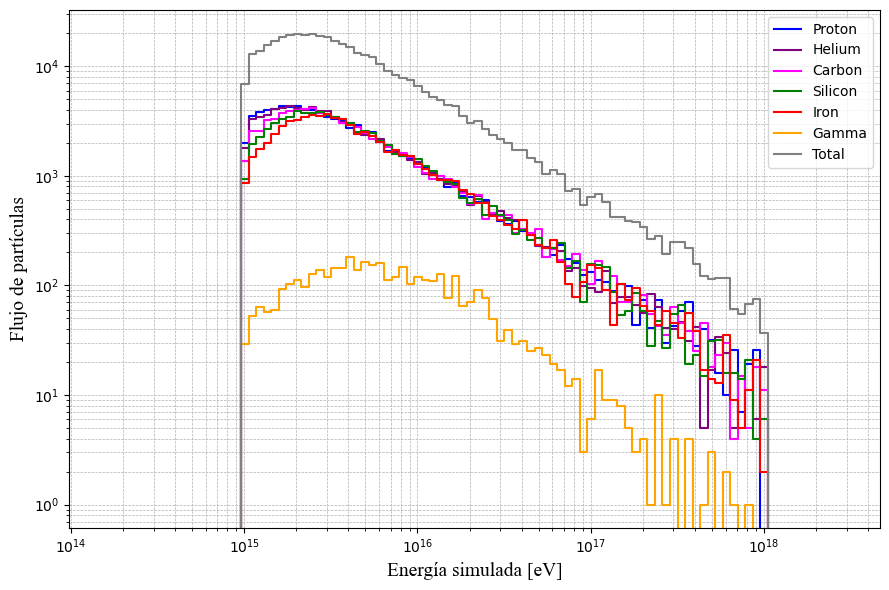

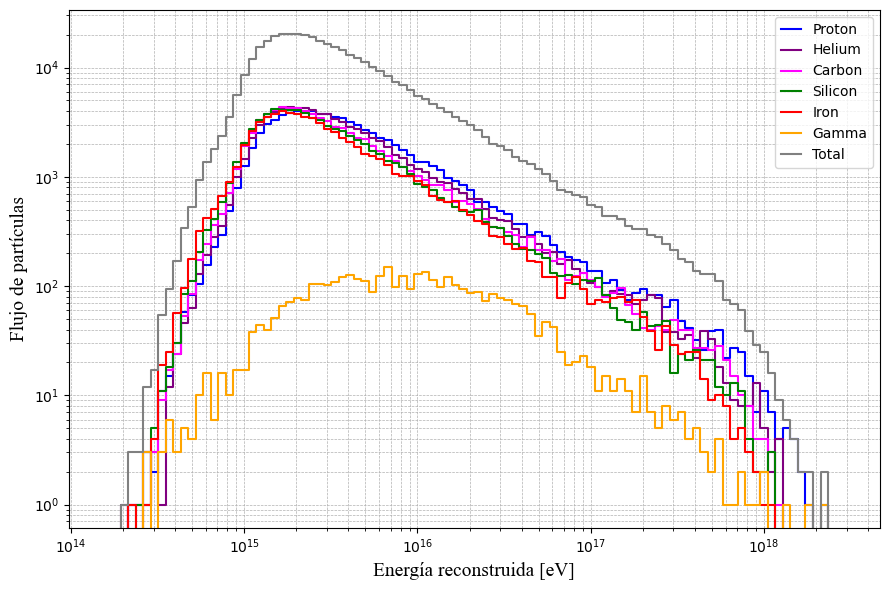

In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
files = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_pr.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_he.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_co.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_si.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_fe.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_gm.root",
}

colors = {
    "Proton": "blue",
    "Helium": "purple",
    "Carbon": "magenta",
    "Silicon": "green",
    "Iron": "red",
    "Gamma": "orange",
}

# --- PARÁMETROS DEL HISTOGRAMA ---
n_bins = 100
#bin_edges = np.logspace(14.75, 18.15, n_bins)  # Energías en escala log-log
bin_edges = np.logspace(14.2, 18.5, n_bins)  # Energías en escala log-log

# --- FUNCIONES ---
def load_energy(file_path):
    """Carga energías simuladas y reconstruidas desde un archivo ROOT."""
    with uproot.open(file_path) as file:
        # Árboles y ramas
        tree_sim = file["trmc;1"]

        # Energías simuladas y reconstruidas
        energy_sim = 10 ** tree_sim["TrEP"].array(library="np")  # Simulada (log10 a lineal)

    return energy_sim, energy_rec

total_hist_sim = np.zeros(n_bins - 1)

for primary, filepath in files.items():
    energy_sim, _ = load_energy(filepath)

    # Histograma simulado
    hist_sim, _ = np.histogram(energy_sim, bins=bin_edges)
    plt.step(bin_edges[:-1], hist_sim, where="post", label=primary, color=colors[primary])
    
    # Acumular el histograma total simulado
    total_hist_sim += hist_sim

# Graficar total simulado
plt.step(bin_edges[:-1], total_hist_sim, where="post", label="Total", color="gray")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energía simulada [eV]", fontsize=14, fontname='Times New Roman')
plt.ylabel("Flujo de partículas", fontsize=14, fontname='Times New Roman')
plt.legend(fontsize=10)
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"EPOS_Espectro de energía simulada por primario y total.pdf") 
plt.show()

# Gráfico 2: Energía reconstruida por primarios y total reconstruida
plt.figure(figsize=(9, 6))
total_hist_rec = np.zeros(n_bins - 1)

for primary, filepath in files.items():
    _, energy_rec = load_energy(filepath)

    # Histograma reconstruido
    hist_rec, _ = np.histogram(energy_rec, bins=bin_edges)
    plt.step(bin_edges[:-1], hist_rec, where="post", label=primary, color=colors[primary])
    
    # Acumular el histograma total reconstruido
    total_hist_rec += hist_rec

# Graficar total reconstruido
plt.step(bin_edges[:-1], total_hist_rec, where="post", label="Total", color="gray")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energía reconstruida [eV]", fontsize=14, fontname='Times New Roman')
plt.ylabel("Flujo de partículas", fontsize=14, fontname='Times New Roman')
plt.legend(loc='best', fontsize=10, handlelength=1.5)  # Ajuste para mostrar rectángulos
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
#plt.savefig(f"EPOS_Espectro de energía reconstruido por primarios y total.png") 
#plt.savefig(f"EPOS_Espectro de energía reconstruido por primarios y total.png", dpi=600) 
plt.show()


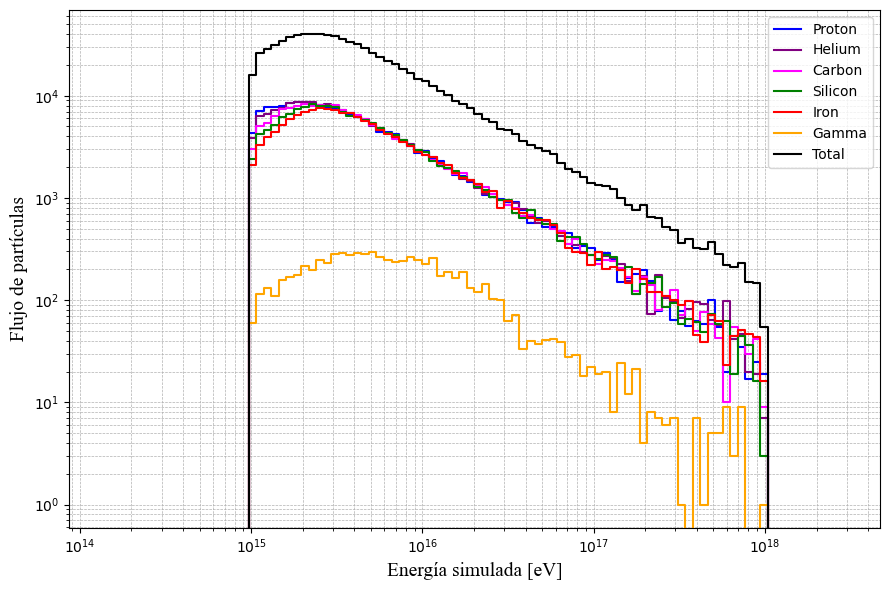

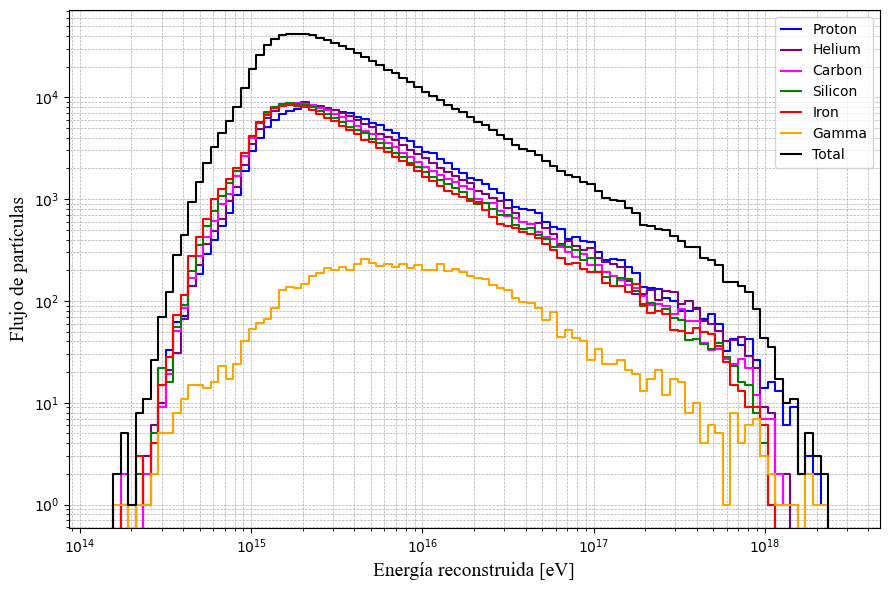

In [10]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURACIÓN ---
files = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_pr1.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_he1.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_co1.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_si1.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_fe1.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_gm1.root",
}

colors = {
    "Proton": "blue",
    "Helium": "purple",
    "Carbon": "magenta",
    "Silicon": "green",
    "Iron": "red",
    "Gamma": "orange",
}

# --- PARÁMETROS DEL HISTOGRAMA ---
n_bins = 100
#bin_edges = np.logspace(14.75, 18.15, n_bins)  # Energías en escala log-log
bin_edges = np.logspace(14.15, 18.5, n_bins)  # Energías en escala log-log

# --- FUNCIONES ---
def load_energy(file_path):
    """Carga energías simuladas y reconstruidas desde un archivo ROOT."""
    with uproot.open(file_path) as file:
        # Árboles y ramas
        tree_sim = file["trmc;1"]
        tree_rec = file["comb;1"]

        # Energías simuladas y reconstruidas
        energy_sim = 10 ** tree_sim["TrEP"].array(library="np")  # Simulada (log10 a lineal)
        energy_rec = 10 ** tree_rec["E"].array(library="np")  # Reconstruida (log10 a lineal)

    return energy_sim, energy_rec

# --- PROCESAMIENTO Y GRAFICADO ---

# Gráfico 1: Energía simulada por primarios y total simulada
plt.figure(figsize=(9, 6))
total_hist_sim = np.zeros(n_bins - 1)

for primary, filepath in files.items():
    energy_sim, _ = load_energy(filepath)

    # Histograma simulado
    hist_sim, _ = np.histogram(energy_sim, bins=bin_edges)
    plt.step(bin_edges[:-1], hist_sim, where="post", label=primary, color=colors[primary])
    
    # Acumular el histograma total simulado
    total_hist_sim += hist_sim

# Graficar total simulado
plt.step(bin_edges[:-1], total_hist_sim, where="post", label="Total", color="Black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energía simulada [eV]", fontsize=14, fontname='Times New Roman')
plt.ylabel("Flujo de partículas", fontsize=14, fontname='Times New Roman')
plt.legend(fontsize=10)
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"QGSJET_Espectro de energía simulada por primario y total.pdf") 
plt.show()

# Gráfico 2: Energía reconstruida por primarios y total reconstruida
plt.figure(figsize=(9, 6))
total_hist_rec = np.zeros(n_bins - 1)

for primary, filepath in files.items():
    _, energy_rec = load_energy(filepath)

    # Histograma reconstruido
    hist_rec, _ = np.histogram(energy_rec, bins=bin_edges)
    #plt.step(bin_edges[:-1], hist_rec, histtype='step', lw=2, where="post", label=primary, color=colors[primary], density=True)
    plt.step(bin_edges[:-1], hist_rec, where="post", label=primary, color=colors[primary])

    # Acumular el histograma total reconstruido
    total_hist_rec += hist_rec

# Graficar total reconstruido
plt.step(bin_edges[:-1], total_hist_rec, where="post", label="Total", color="black")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energía reconstruida [eV]", fontsize=14, fontname='Times New Roman')
plt.ylabel("Flujo de partículas", fontsize=14, fontname='Times New Roman')
plt.legend(loc='best', fontsize=10, handlelength=1.5)  # Ajuste para mostrar rectángulos
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
#plt.savefig(f"QGSJET_Espectro de energía reconstruido por primarios y total.pdf") 
plt.show()

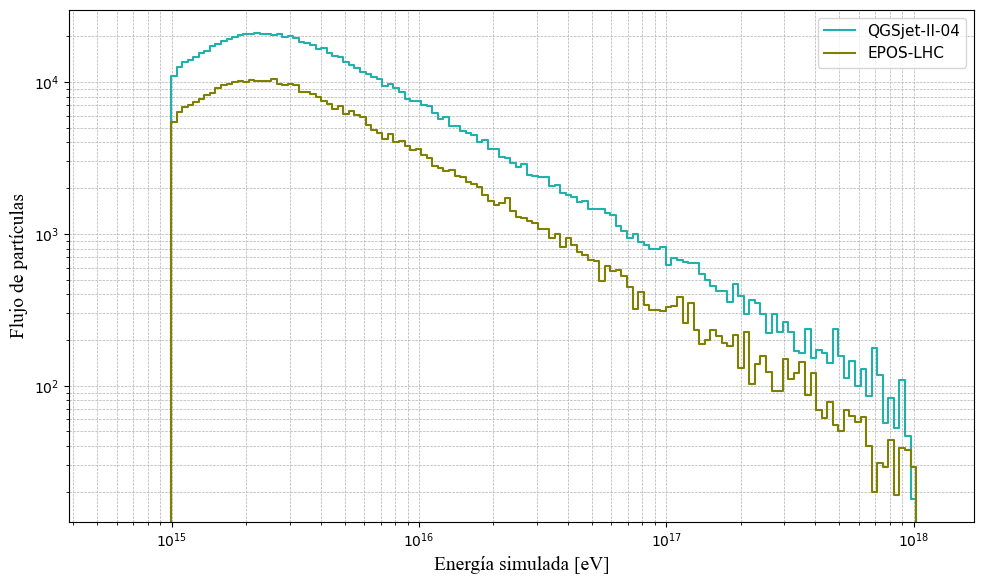

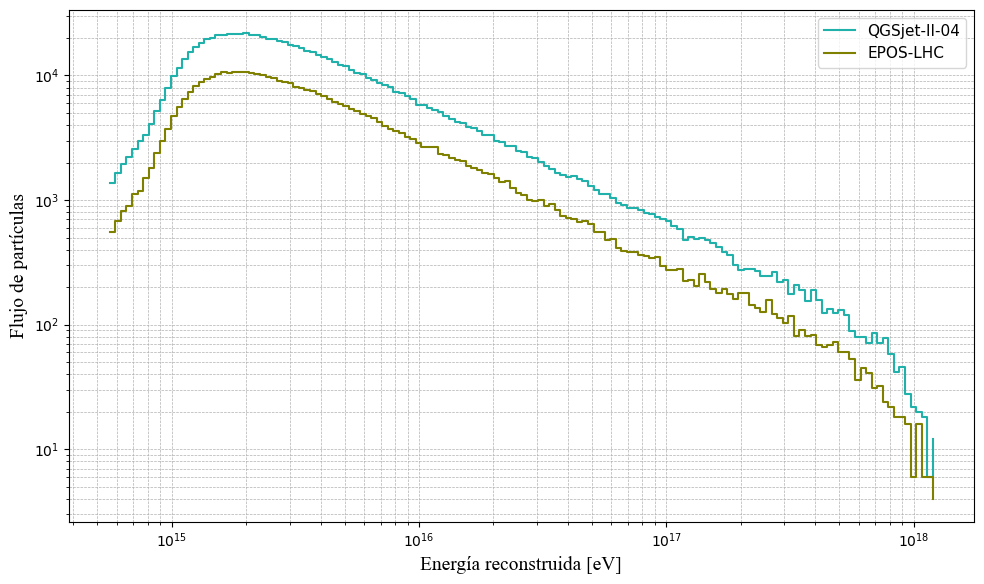

In [37]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

# --- CONFIGURACIÓN ---
files_qgsjet = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_pr1.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_he1.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_co1.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_si1.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_fe1.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_gm1.root",
}

files_epos = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_pr.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_he.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_co.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_si.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_fe.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_gm.root",
}

# --- PARÁMETROS DEL HISTOGRAMA ---
n_bins = 150
bin_edges = np.logspace(14.75, 18.1, n_bins)  # Energías en escala log-log

# --- FUNCIONES ---
def load_energy_total(files, energy_key):
    """Carga energías totales simuladas o reconstruidas de múltiples archivos ROOT."""
    total_hist = np.zeros(len(bin_edges) - 1)

    for filepath in files.values():
        with uproot.open(filepath) as file:
            tree = file["trmc;1"] if energy_key == "TrEP" else file["comb;1"]
            energy_log = tree[energy_key].array(library="np")
            energy = 10 ** energy_log  # Convertir log10 a valores lineales 
            hist, _ = np.histogram(energy, bins=bin_edges)
            total_hist += hist

    return total_hist

# --- PROCESAMIENTO ---
# Cargar datos de espectro de energía total
qgsjet_sim_total = load_energy_total(files_qgsjet, "TrEP")  # Simulado QGSJET
epos_sim_total = load_energy_total(files_epos, "TrEP")  # Simulado EPOS

qgsjet_rec_total = load_energy_total(files_qgsjet, "E")  # Reconstruido QGSJET
epos_rec_total = load_energy_total(files_epos, "E")  # Reconstruido EPOS


# --- GRÁFICO 1: Espectro de energía simulado total ---
plt.figure(figsize=(10, 6))
plt.step(bin_edges[:-1], qgsjet_sim_total, where="post", label="QGSjet-II-04", color="lightseagreen")
plt.step(bin_edges[:-1], epos_sim_total, where="post", label="EPOS-LHC", color="olive")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energía simulada [eV]", fontsize=14, fontname='Times New Roman')
plt.ylabel("Flujo de partículas", fontsize=14, fontname='Times New Roman')
plt.legend(fontsize=11)
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig(f"Energia Simulada Total QGsjet II-04 y EPOS.png") 
plt.show()

# --- GRÁFICO 2: Espectro de energía reconstruido total ---
plt.figure(figsize=(10, 6))
plt.step(bin_edges[:-1], qgsjet_rec_total, where="post", label="QGSjet-II-04", color="lightseagreen")
plt.step(bin_edges[:-1], epos_rec_total, where="post", label="EPOS-LHC", color="olive")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energía reconstruida [eV]", fontsize=14, fontname='Times New Roman')
plt.ylabel("Flujo de partículas", fontsize=14, fontname='Times New Roman')
plt.legend(fontsize=11)
plt.grid(which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
#plt.savefig(f"Energia Reconstruida Total QGsjet II-04 y EPOS.png") 
plt.show()


In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import awkward as ak

# --- CONFIGURACIÓN ---
files_qgsjet = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_pr1.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_he1.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_co1.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_si1.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_fe1.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_qgs-4_gm1.root",
}

files_epos = {
    "Proton": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_pr.root",
    "Helium": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_he.root",
    "Carbon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_co.root",
    "Silicon": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_si.root",
    "Iron": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_fe.root",
    "Gamma": "C:/Users/MSI/extraidos/COMBINED_Sim_epos-LHC_gm.root",
}

# --- Parámetros de binning ---
bin_edges = np.logspace(14.50, 18, 100)  # Bins en eV
colors = {'QGSJET': '#1f77b4', 'EPOS': '#d62728'}

# --- Función para cargar y normalizar datos ---
def load_energy_total(files, energy_type='TrEP'):
    """Carga energía simulada (TrEP) o reconstruida (E) y normaliza por número de eventos."""
    total_hist = np.zeros(len(bin_edges)-1, dtype=np.float64)
    for filepath in files.values():
        with uproot.open(filepath) as file:
            tree = file["trmc;1"] if energy_type == 'TrEP' else file["comb;1"]
            energy_log = tree[energy_type].array()
            energy = 10 ** ak.to_numpy(energy_log)  # Convertir a eV
            hist, _ = np.histogram(energy, bins=bin_edges)
            n_events = len(energy_log)
            total_hist += hist.astype(np.float64) / n_events
    return total_hist

# --- Procesar datos para simulada y reconstruida ---
qgs_sim = load_energy_total(files_qgsjet, 'TrEP')
epos_sim = load_energy_total(files_epos, 'TrEP')

qgs_rec = load_energy_total(files_qgsjet, 'E')
epos_rec = load_energy_total(files_epos, 'E')

# --- Tests estadísticos ---
D_sim, p_sim = stats.ks_2samp(qgs_sim, epos_sim)
D_rec, p_rec = stats.ks_2samp(qgs_rec, epos_rec)

# Ajuste para el test de Chi-cuadrado
epsilon = 1e-10  # Pequeño valor para evitar división por cero
chi2_sim = stats.chisquare(qgs_sim, f_exp=np.where(epos_sim > 0, epos_sim, epsilon) * (np.sum(qgs_sim) / np.sum(epos_sim)))[0]
chi2_rec = stats.chisquare(qgs_rec, f_exp=epos_rec * (np.sum(qgs_rec) / np.sum(epos_rec)))[0]

pearson_sim, _ = stats.pearsonr(qgs_sim, epos_sim)
pearson_rec, _ = stats.pearsonr(qgs_rec, epos_rec)

# --- Gráfico 1: Energía Simulada Total ---
plt.figure(figsize=(9,6))
plt.step(bin_edges[:-1], qgs_sim, where='post', label='QGSJET-II-04', color=colors['QGSJET'], linewidth=1.5)
plt.step(bin_edges[:-1], epos_sim, where='post', label='EPOS-LHC', color=colors['EPOS'], linewidth=1.5)

# Texto estadístico
stats_text_sim = (f" KS-test: D = {D_sim:.3f}\n"
                  f" p-value = {p_sim:.2e}\n"
                  f" Chi² = {chi2_sim:.3f}\n"
                  f" Pearson = {pearson_sim:.3f}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energía simulada [eV]', fontsize=14, fontname='Times New Roman')
plt.ylabel('Flujo normalizado (eventos/bin)', fontsize=14, fontname='Times New Roman')
plt.legend(loc='upper right', fontsize=12, frameon=True)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.savefig("Comparacion_Modelos_Energia_Simulada.pdf", dpi=600)
plt.close()

# --- Gráfico 2: Energía Reconstruida Total ---
plt.figure(figsize=(9,6))
plt.step(bin_edges[:-1], qgs_rec, where='post', label='QGSJET-II-04', color=colors['QGSJET'], linewidth=1.5)
plt.step(bin_edges[:-1], epos_rec, where='post', label='EPOS-LHC', color=colors['EPOS'], linewidth=1.5)

# Texto estadístico
stats_text_rec = (f" KS-test: D = {D_rec:.3f}\n"
                  f" p-value = {p_rec:.2e}\n"
                  f" Chi² = {chi2_rec:.3f}\n"
                  f" Pearson = {pearson_rec:.3f}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energía reconstruida [eV]', fontsize=14, fontname='Times New Roman')
plt.ylabel('Flujo normalizado (eventos/bin)', fontsize=14, fontname='Times New Roman')
plt.legend(loc='upper right', fontsize=12, frameon=True)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.savefig("Comparacion_Modelos_Energia_Reconstruida.pdf", dpi=600)
plt.close()

# --- IMPRESIÓN DE ESTADÍSTICAS POR GRÁFICO ---
print("\n--- MÉTRICAS DE COMPARACIÓN PARA ENERGÍA SIMULADA (TrEP) ---")
print(f"Correlación de Pearson: {pearson_sim:.3f}")
print(f"Chi-cuadrado: {chi2_sim:.3f}")
print(f"KS-test: D = {D_sim:.3f}, p-value = {p_sim:.3e}")

print("\n--- MÉTRICAS DE COMPARACIÓN PARA ENERGÍA RECONSTRUIDA (E) ---")
print(f"Correlación de Pearson: {pearson_rec:.3f}")
print(f"Chi-cuadrado: {chi2_rec:.3f}")
print(f"KS-test: D = {D_rec:.3f}, p-value = {p_rec:.3e}")



--- MÉTRICAS DE COMPARACIÓN PARA ENERGÍA SIMULADA (TrEP) ---
Correlación de Pearson: 0.999
Chi-cuadrado: 0.026
KS-test: D = 0.051, p-value = 9.997e-01

--- MÉTRICAS DE COMPARACIÓN PARA ENERGÍA RECONSTRUIDA (E) ---
Correlación de Pearson: 0.999
Chi-cuadrado: 0.017
KS-test: D = 0.040, p-value = 1.000e+00
